# PREDICCION: **Direccion Feigenbaum Exponencial**

Epoch 1/20
460/460 [==============================] - 10s 14ms/step - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 2/20
460/460 [==============================] - 7s 15ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 3/20
460/460 [==============================] - 6s 12ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 4/20
460/460 [==============================] - 7s 16ms/step - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 5/20
460/460 [==============================] - 6s 13ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 6/20
460/460 [==============================] - 7s 15ms/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 7/20
460/460 [=

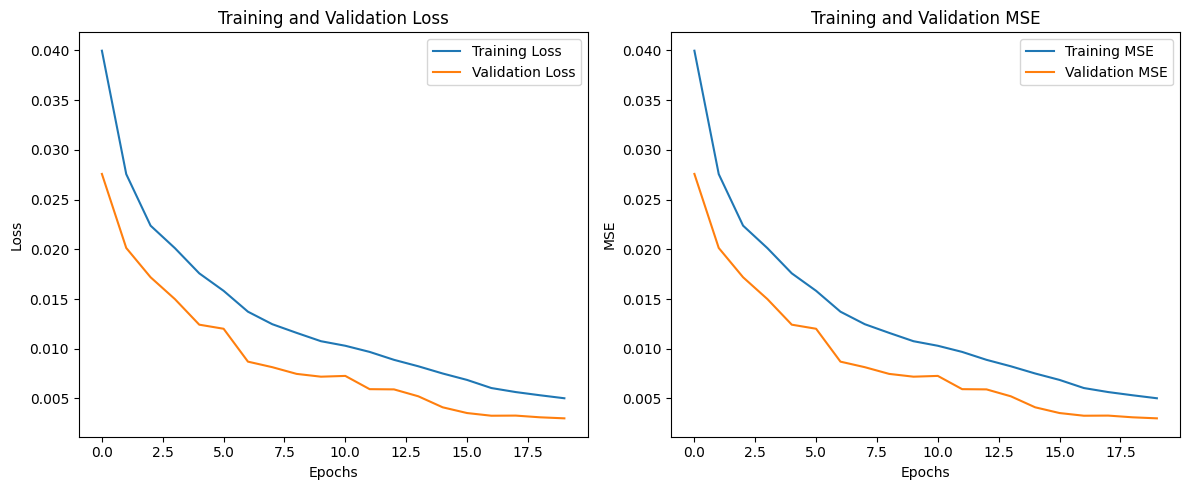

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanSquaredError

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

data = pd.read_csv('salida.csv')

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

time_steps = 5
X, y = create_dataset(pd.DataFrame(data_scaled), pd.DataFrame(data_scaled), time_steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Sequential([
    LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(2)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[MeanSquaredError()])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


R2 = 0.5804428397112509


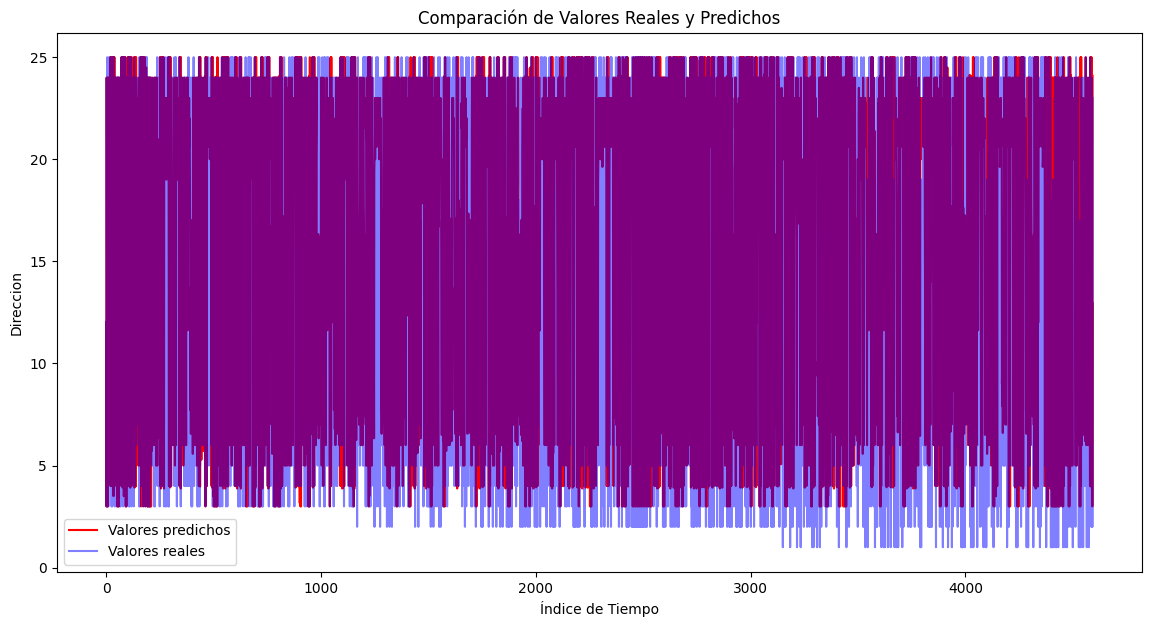

In [ ]:
print(errorr2)

plt.figure(figsize=(14, 7))
plt.plot(predicted_values, label='Valores predichos', color='red')
plt.plot(actual_values, label='Valores reales', color='blue', alpha=0.5)
plt.title('Comparación de Valores Reales y Predichos')
plt.xlabel('Índice de Tiempo')
plt.ylabel('Direccion')
plt.legend()
plt.show()

